# Banking Fraud
# Gaining Insights into Fraud Patterns. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt

In [3]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

## Fraud Dataset Overview

#### This dataset is a simulated representation of bank transactions generated by the **PaySim Mobile Money Simulator.** PaySim models mobile money transactions based on a real sample extracted from one month of financial logs from a mobile money service operating in an African country. A synthetic simulator is used due to the scarcity of publicly and privacy concerns. 

#### available financial transaction data.

#### The dataset contains **6,362,620 unique transactions** across **five transaction types**:

    Transfers (EFTs OUT)
    Payments (EFTs IN)
    Cash Deposits
    Cash Withdrawals
    Debit Orders

#### As this is a simulation, the dataset does not specify a currency. However, for ease of interpretation, all values will be considered in dollars. Transaction amounts range from 

#### 63 dollars to $10 million.

#### Fraud detection in this dataset is limited, as there are few variables, there is therefore no indication on how fraudulent activity is identified. The **"fraud"** column is a binary variable:

    1 = Fraudulent transaction
    0 = Non-fraudulent transaction

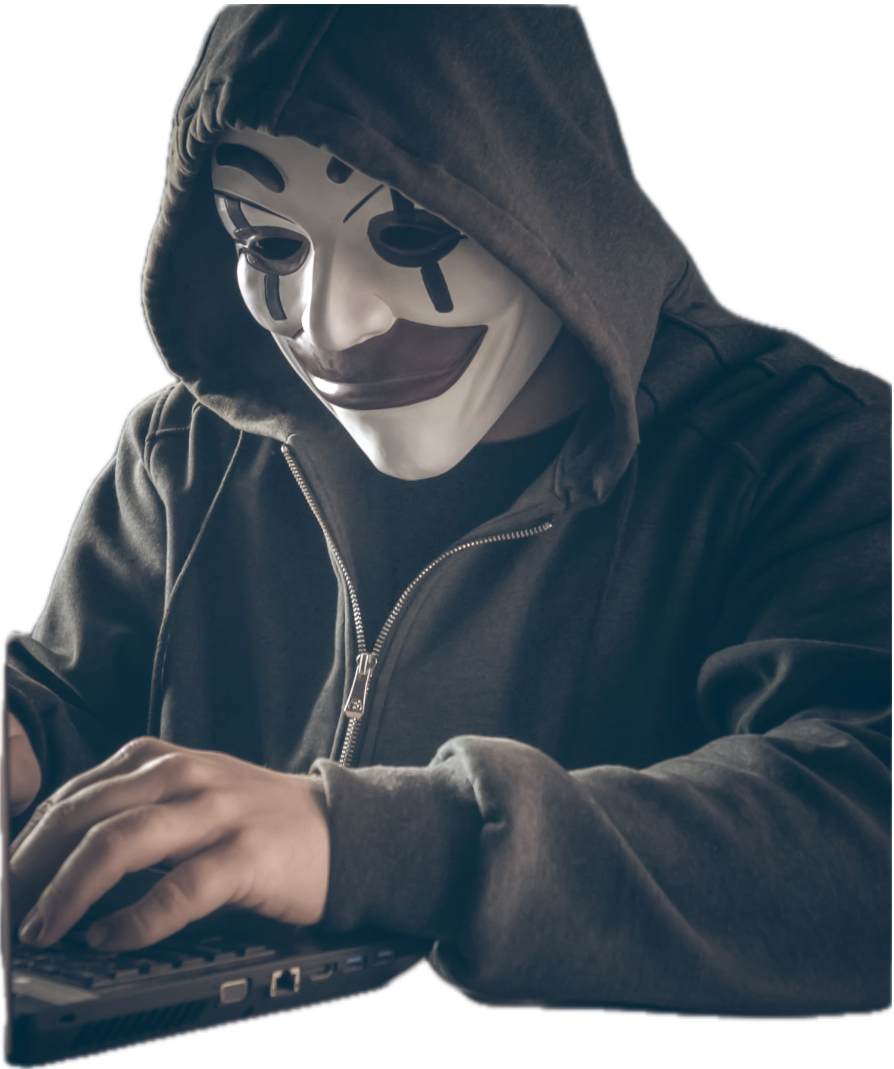

In [98]:
from IPython.display import Image, display

image_path = "/Users/Mthuthukile/Desktop/dspt18/Project-1-Individual-Mthuthukile/Subject.png"
display(Image(filename=image_path, width=300))

## FIVE KEY QUESTIONS

#### 1. How many transactions are repeat customer transactions?
#### 2. How many transactions are fraudulent?
#### 3. How many transactions that are fraud are flagged as Fraud?
#### 4. Fraud is committed mostly under which 'type of transaction'?
#### 5. Is there a relation with fraud and value? What is the Distribution of Fraud Cases?



#### Data Link: https://www.kaggle.com/datasets/ealaxi/paysim1

# Exploring The Data

In [96]:
fraud_df = pd.read_csv('/Users/Mthuthukile/Desktop/dspt18/Project-1-Individual-Mthuthukile/Dataset_creditCard_Fraud.csv')

fraud_df.head(10) 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
fraud_df.rename(columns = {'nameOrig': 'sender_name',
                           'oldbalanceOrg': 'sender_old_balance', 
                           'newbalanceOrig' :'sender_new_balance',
                           'nameDest': 'recipient_name',
                           'oldbalanceDest': 'recipient_old_balance',
                           'newbalanceDest': 'recipient_new_balance'},
                            inplace = True
               )               

In [7]:
fraud_df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

#### Calculations 

In [8]:
41720.00 - 36382.23

5337.769999999997

In [9]:
41898.0	- 40348.79

1549.2099999999991

#### Note


PAYMENTS is payment into original account so original account goes up

TRANSFER is payment  out original account so original account goes down

CASH-IN is a deposit so  original account so original account goes up

CASH-OUT is a withdrawal so original account so original account goes down
DEBIT 

In [10]:
fraud_df['type'] = fraud_df['type'].replace(
    {'TRANSFER': 'EFT_OUT',
     'PAYMENT': 'EFT_IN',
     'CASH_OUT': 'WITHDRAWAL',
     'CASH_IN':'DEPOSIT'
    })

In [11]:

fraud_df.head() 

,step,type,amount,sender_name,sender_old_balance,sender_new_balance,recipient_name,recipient_old_balance,recipient_new_balance,isFraud,isFlaggedFraud
0,1,EFT_IN,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,EFT_IN,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,EFT_OUT,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,WITHDRAWAL,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,EFT_IN,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
fraud_df.shape

(6362620, 11)

#### Huge dataset of 6,362,620 transactions

In [13]:
fraud_df.type.value_counts()

type
WITHDRAWAL    2237500
EFT_IN        2151495
DEPOSIT       1399284
EFT_OUT        532909
DEBIT           41432
Name: count, dtype: int64

In [ ]:
#sns.countplot(
    #data = fraud_df,
    #x = 'amount',
    #hue = 'type',
    #palette = 'rocket'

#)

#plt.title('Transaction Type Frequency')  
#plt.ylabel('Transaction Count')

### Cash withdrawals are the most frequent transactions followed by EFT_in. This is somewhat ecpected as it means most individuals would get paid and transact through spending. 

In [14]:
fraud_df.isnull().sum()

step                     0
type                     0
amount                   0
sender_name              0
sender_old_balance       0
sender_new_balance       0
recipient_name           0
recipient_old_balance    0
recipient_new_balance    0
isFraud                  0
isFlaggedFraud           0
dtype: int64

In [15]:
fraud_df.duplicated().sum()

0

### There are no NAN values or Duplicate payments. This is not surprising given it is a simulation. 

In [16]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   step                   int64  
 1   type                   object 
 2   amount                 float64
 3   sender_name            object 
 4   sender_old_balance     float64
 5   sender_new_balance     float64
 6   recipient_name         object 
 7   recipient_old_balance  float64
 8   recipient_new_balance  float64
 9   isFraud                int64  
 10  isFlaggedFraud         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# 1. How many repeat customer transactions?

In [17]:
fraud_df['sender_name'].nunique()

6353307

### Some customers are observed more than once in the dataset but that number is very low 6,362,620 -6,353,307 =9,313 so a maximum of 0.146% of transactions are of the same customer. This is ideal as more reflective of population. 

# 2. How many transactions are fraudulent

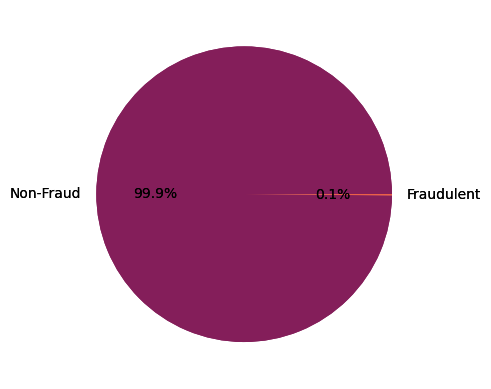

In [94]:
#Using the colour palette from Seaborn
rocket_colours = sns.color_palette ('rocket', n_colors = 2)

#Creating pie-chart of fraudulent percentages
fraud_df['isFraud'].value_counts(normalize=True).plot.pie(labels=['Non-Fraud','Fraudulent'],autopct='%1.1f%%', colors = rocket_colours)

# Removing the default "proportion" title
plt.ylabel('')

plt.show()

### 1 Percent of entire population is picked up as fraudulent, which is great for society but bad for model training which needs more patterns. 

# 3. How many transactions that are fraud are flagged as Fraud

In [19]:
## Double-checking that fraud values are indeed Binary

fraud_df['isFraud'].unique()
fraud_df['isFlaggedFraud'].unique()

array([0, 1])

In [20]:
fraudulent_trans = fraud_df[fraud_df['isFraud'] == 1].copy()
fraudulent_trans.shape 

(8213, 11)

In [21]:
fraudulent_trans['isFlaggedFraud'].value_counts (normalize = True)

isFlaggedFraud
0    0.998052
1    0.001948
Name: proportion, dtype: float64

In [22]:
fraudulent_trans['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    8197
1      16
Name: count, dtype: int64

### 99.8% of fraud cases are flagged! That's an extremely high rate.

### At some point we picked up that there were a few transactions that were flagged as fraud where the transaction value was zero. 

## How many False-Positives: How many have been recorded as fraudulant when trans amount = 0

In [23]:
#Amount = 0 recorded fraud cases

fraudulent_trans[fraudulent_trans['amount'] == 0]

,step,type,amount,sender_name,sender_old_balance,sender_new_balance,recipient_name,recipient_old_balance,recipient_new_balance,isFraud,isFlaggedFraud
2736447,212,WITHDRAWAL,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,WITHDRAWAL,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,WITHDRAWAL,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,WITHDRAWAL,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,WITHDRAWAL,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,WITHDRAWAL,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,WITHDRAWAL,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,WITHDRAWAL,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,WITHDRAWAL,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,WITHDRAWAL,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [24]:
fraudulent_trans[fraudulent_trans['amount'] == 0].shape #16 rows , 11 columns 

(16, 11)

### There are 16 transactions that are labelled as fraudulent eventhough the transaction amount is zero!
### Note above however that these are the 16 'isfraud' cases that are not 'flagged.' This explains how the 'isFlaggedFraud' operates.
### Going forward we will use 'isflagged' data to observe fraudulant cases, as those that aren't flagged are certainly not fraud cases.

# 4. Fraud is committed mostly under which 'type' of transaction

In [26]:
print(f"Total Fraud Cases: {fraudulent_trans.shape}")

flagged_fraud = fraudulent_trans.loc[fraudulent_trans['amount'] != 0] #Keeping only cases where amount is not 0

print (f"Flagged Fraud Cases: {flagged_fraud.shape}")

Total Fraud Cases: (8213, 11)
Flagged Fraud Cases: (8197, 11)


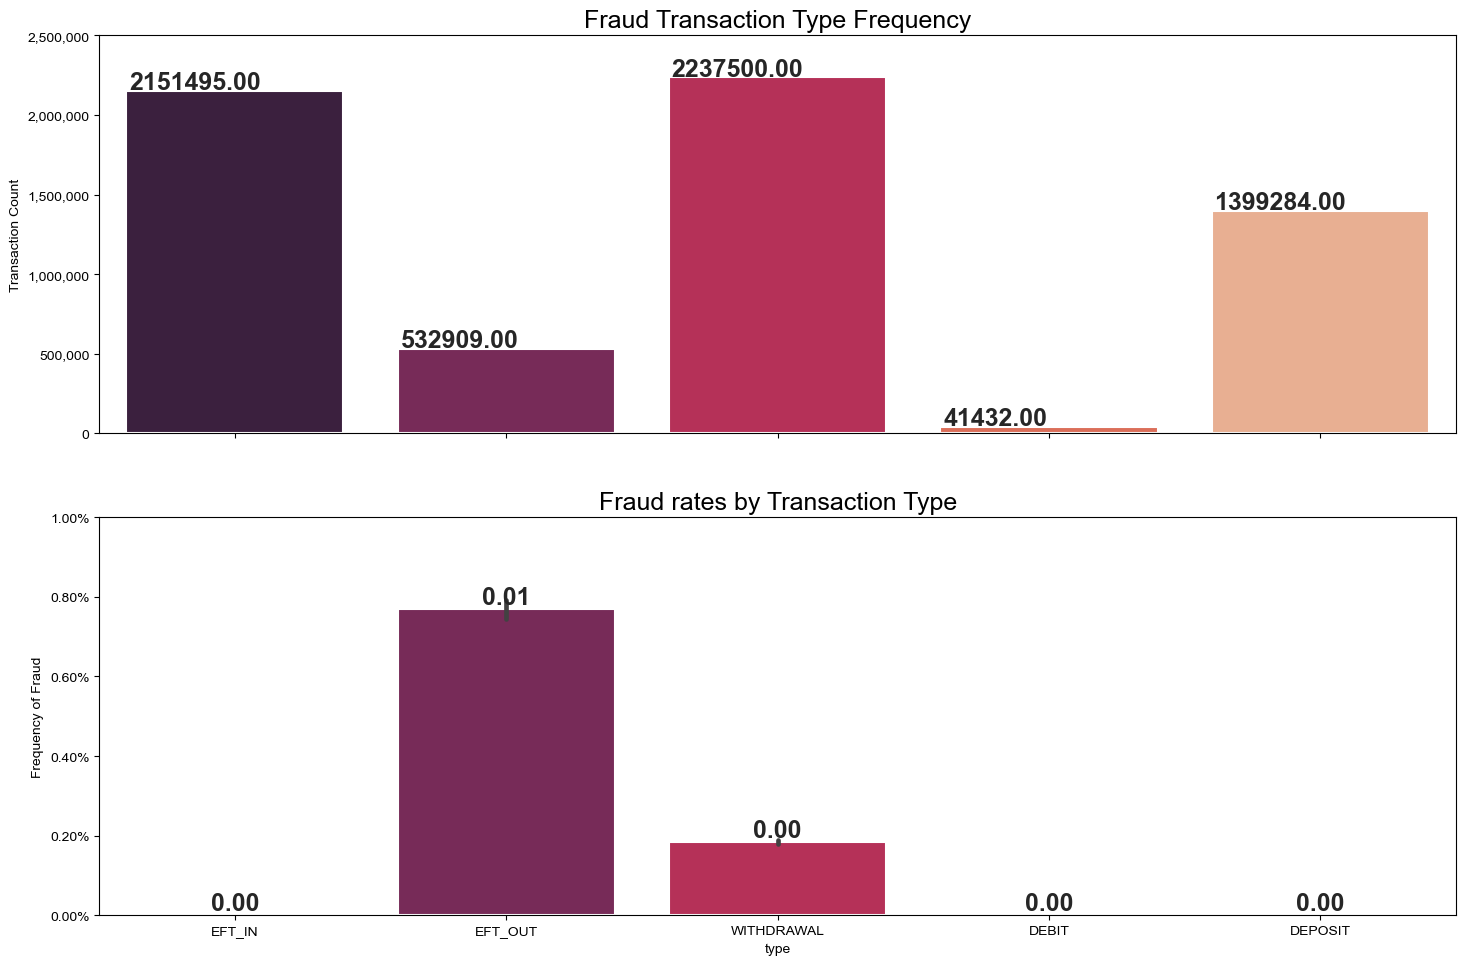

In [27]:
fig, axes = plt.subplots(nrows =2, ncols = 1, figsize = (15,10), sharex = True)
sns.set_theme(style="white", context="talk")

plt.subplot(2, 1, 1) # (rows, columns, panel number)

#Countplot for Transaction Type Frequency
ax1 = sns.countplot(
    data = fraud_df,
    x = 'type',
    hue = 'type',
    palette = 'rocket',
    ax = axes [0]
)

#Formatting y_axis tick labels to make them percentages:
current_values = axes[0].get_yticks()
axes[0].set_yticks(current_values)
axes[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

#Annotating countplot[putting value above each bar]
for p in ax1.patches:
        ax1.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000),
                    fontweight='bold')

axes[0].set_title("Fraud Transaction Type Frequency")
axes[0].set_ylabel("Transaction Count")


# create the second panel and set current axis
plt.subplot(2, 1, 2)

#barplot for Fraud By Transaction Type
ax2 = sns.barplot(
    data = fraud_df,
    x = 'type',
    y = 'isFraud',
    hue = 'type',
    palette = 'rocket',
    ax = axes [1]
)

for bar in ax2.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontweight='bold')

#Formatting y_axis tick labels to make them percentages:
current_values = axes[1].get_yticks()
axes[1].set_yticks(current_values)
axes[1].set_yticklabels(['{:,.2%}'.format(x) for x in current_values])

axes[1].set_title("Fraud rates by Transaction Type")
axes[1].set_ylabel("Frequency of Fraud")


#Adjust layout to prevent overlapping 
#sns.despine(bottom=True)
plt.tight_layout(h_pad = 2)

plt.show()

#Barchart = configure y-min (0) and y-max (10%) to adjust your-scale

### All Fraud transactions picked up are with money going out and money being withdrawn. None are picked up with money coming in. This is a useful observation but also probelamtic as it shows a gap in fraud detection. Also at what point are they able to detect the fraudulent activity as withdrawals should be able to flag it when money is coming in the account. 

In [28]:
fraudulent_trans['type'].value_counts()

type
WITHDRAWAL    4116
EFT_OUT       4097
Name: count, dtype: int64

### Indeed all fraud is picked up with transactions where funds are coming out

<Axes: ylabel='proportion'>

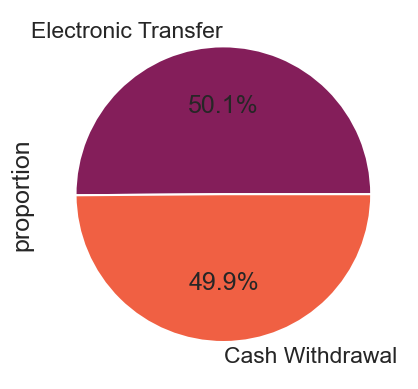

In [29]:
#Using the colour palette from Seaborn
rocket_colours = sns.color_palette ('rocket', n_colors = 2)

#Creating pie-chart of fraudulent percentages
fraudulent_trans['type'].value_counts(normalize=True).plot.pie(labels=['Electronic Transfer','Cash Withdrawal'],autopct='%1.1f%%', colors = rocket_colours)



## 5. What is the median and mean fraud transaction value? Is there a relation with fraud and value?

In [30]:
flagged_fraud['amount'].describe()

count    8.197000e+03
mean     1.470833e+06
std      2.405723e+06
min      6.380000e+01
25%      1.275643e+05
50%      4.422902e+05
75%      1.525742e+06
max      1.000000e+07
Name: amount, dtype: float64

$COUNT:$ 8 197

$MEAN:$ 1 470 833 (average value of fraud transactions)

$STD:$ 2 405 723

$MIN:$ 63 (Min amount defrauded)

$LOWER-Q:$ 127 564

$MIDPOINT:$ 442 902

$UPPER-Q$ 1 525 742

$MAX:$ 10 000 000 (Max amount defrauded)

#### Most fraud transactions are in the six figure range of $100K-%1.5M

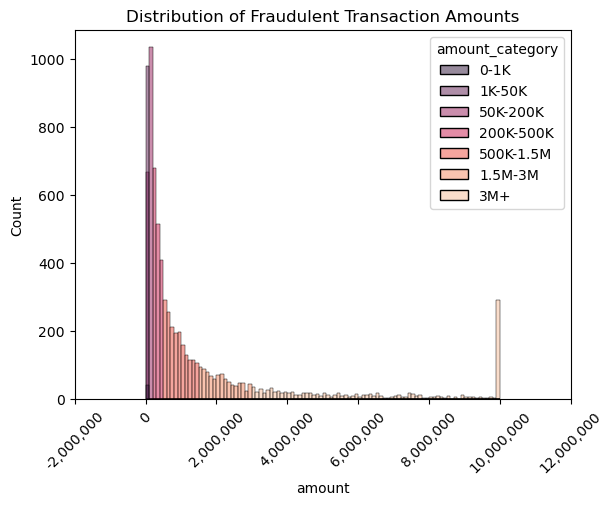

In [73]:

#Creating Bins to allow use of 'hue'
fraudulent_trans['amount_category'] = pd.cut(
    fraudulent_trans['amount'],
    bins = [0, 1000, 50000, 200000, 500000, 1500000, 3000000, 10000000],
    labels = ['0-1K', '1K-50K','50K-200K', '200K-500K', '500K-1.5M', '1.5M-3M', '3M+']
)

#Ensuring the 16 non-fraud transactions are not included in analysis
fraudulent_trans = fraudulent_trans[fraudulent_trans['amount'] > 0]

#setting the colour pallette from seaborn
rocket_colours1 = sns.color_palette("rocket", n_colors=len(fraudulent_trans['amount_category'].unique()))


sns.histplot(
    data = fraudulent_trans,
    x = 'amount',
    hue = 'amount_category',
    bins = 100, 
    palette= rocket_colours1
)

#Formatting the x-axis
current_values = plt.gca().get_xticks()  #Getting current tick positions 
plt.gca().set_xticks(current_values)
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) #formatting tick labels ie converting y-plot from exponenents to integers with 2 decimal places 

plt.xticks(rotation=45)

plt.title('Distribution of Fraudulent Transaction Amounts')
plt.show()

### As indicated Most fraud transactions are in the six figure range of $100K-%1.5M, so the data is negatively distributed where the higher the value of the transaction the lower the fraud. The peak amount of fraud occurs in the 50K-200K bracket and there is an outlier of fraud occuring with 10 million.

In [41]:
sns.reset_defaults()

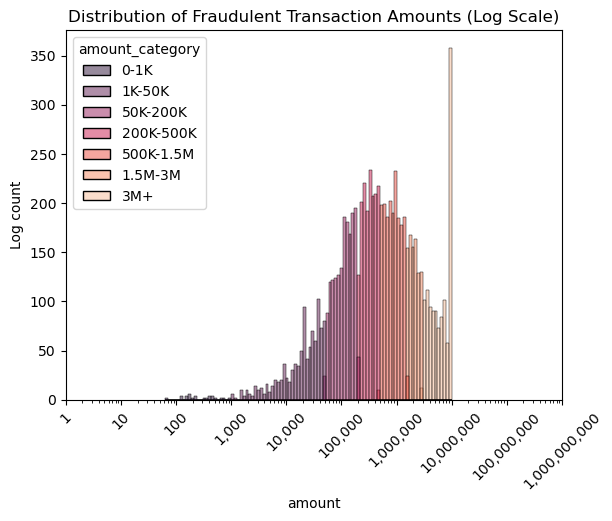

In [36]:
#Creating Bins to allow use of 'hue'
fraudulent_trans['amount_category'] = pd.cut(
    fraudulent_trans['amount'],
    bins = [0, 1000, 50000, 200000, 500000, 1500000, 3000000, 10000000],
    labels = ['0-1K', '1K-50K','50K-200K', '200K-500K', '500K-1.5M', '1.5M-3M', '3M+']
)

#Ensuring the 16 non-fraud transactions are not included in analysis
fraudulent_trans = fraudulent_trans[fraudulent_trans['amount'] > 0]

#setting the colour pallette from seaborn
rocket_colours1 = sns.color_palette("rocket", n_colors=len(fraudulent_trans['amount_category'].unique()))


sns.histplot(
    data = fraudulent_trans,
    x = 'amount',
    hue = 'amount_category',
    log_scale = True,
    bins = 100, 
    palette= rocket_colours1
)

current_values = plt.gca().get_xticks() #Getting current tick positions 
plt.gca().set_xticks(current_values)
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) #formatting tick labels ie converting y-plot from exponenents to integers with 2 decimal places 

plt.xticks(rotation=45)
plt.title('Distribution of Fraudulent Transaction Amounts (Log Scale)')
plt.ylabel('Log count')
plt.show()


### logs "pulls in" more extreme values on the right (high values), while values at the far left (low values) tend to get stretched back. This log normal transformation makes extreme values on the higher end more cpmparible and prevents them from dominating the graph. 

### This near normal shape suggest fraud amounts follow a log-normal distribution, which is common in financial fraud cases. Which means that fraud amounts grow exponentially, not linearly. When ploetted Linearly we see it is negatively skewed (right-skewed) suggesting that most Fraud occurs with lower 'amounts'

### To get a clear picture lets look at it in the form of a probabliity density Function. 

#### Detail:

### Graphs Continued

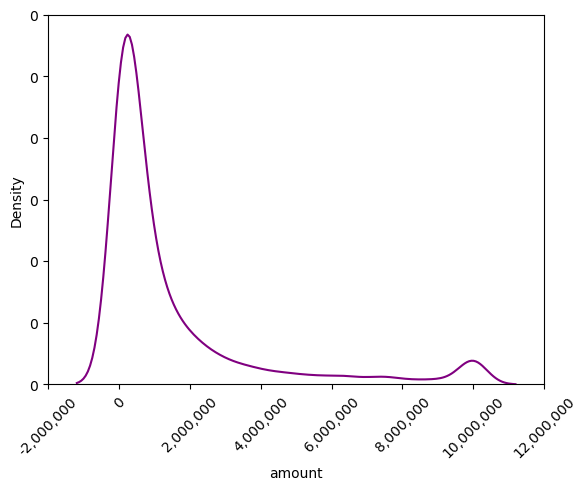

In [46]:

sns.kdeplot(
    data = fraudulent_trans, 
    x = "amount",
    color = 'purple'
)

current_values = plt.gca().get_xticks() #Getting current tick positions 
plt.gca().set_xticks(current_values)
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) #formatting tick labels ie converting y-plot from exponenents to integers with 2 decimal places 


current_values = plt.gca().get_yticks() 
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.000000f}'.format(x) for x in current_values])
#plt.yticks(plt.gca().get_yticks(), plt.gca().get_yticks())

plt.xticks(rotation=45)
plt.show()

### This Further confirms a higher probability of Fraud occuring on lower 'amount' values.

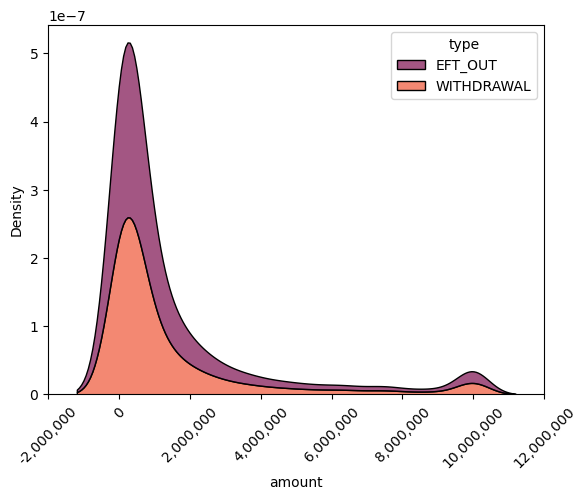

In [38]:
sns.kdeplot(
    data = fraudulent_trans, 
    x = "amount",
    hue = 'type',
    multiple="stack",
    palette = 'rocket'
)

current_values = plt.gca().get_xticks() #Getting current tick positions 
plt.gca().set_xticks(current_values)
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) #formatting tick labels ie converting y-plot from exponenents to integers with 2 decimal places 


plt.xticks(rotation=45)
plt.show()

### When splitting the type transaction types where Fraud occurs, the distribution is exactly the same. So for both transaction types; a higher probability of Fraud occurs on smaller 'amount' values.

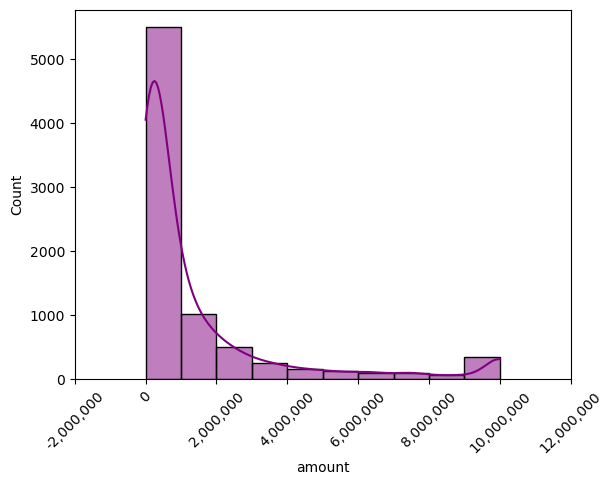

In [92]:

sns.histplot(
    data = fraudulent_trans,
    x = 'amount',
    bins = 10,
    kde = True,
    color = 'purple'
)

current_values = plt.gca().get_xticks()
plt.gca().set_xticks(current_values)
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]) 


plt.xticks(rotation=45)
plt.show()

## Checking The Correlation between Variables 

In [50]:
from scipy.stats import pointbiserialr
corr, p_value = pointbiserialr(fraud_df['isFlaggedFraud'],fraud_df['amount'])
print(f'Correlation:, {corr}')
print(f'p-value: {p_value}')

Correlation:, 0.012294602501427108
p-value: 3.560768102678055e-211


#### The Correlation is close to zero so there is no correlation between the transaction vaue and the liklihood of Fraud. A positive value suggests that higher transaction amounts may slightly increase the liklihood of being flagged, but the effect is very weak. 


#### The p-value is 3.56 x 10^211, which is extremely small, again basically zero. This low p-value is low, which suggests that even though the correlation is weak, it is statistically significant due to a large dataset size. 
#### This means we can reject the null hypothesis, (which assumes there's no correlation).

In [53]:
X = fraud_df[['amount']]
y = fraud_df['isFlaggedFraud']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [55]:
print(X_train.shape)
print(X_test.shape)

(5090096, 1)
(1272524, 1)


In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [72]:
print('B0 is', lr.intercept_)
print('B1 is', lr.coef_)

B0 is [-12.95827624]
B1 is [[1.32143047e-07]]


### The coefficient is 0.000000132. so a $1 increase in transaction amount will cause a 0.000000132 decrease in the liklihood of fraud according to this model. This is an almost negligible effect on the probablility of fraud being flagged. 

### This model is very weak which suggests that 'Amount' alone does not strongly determine 'isFlaggedFraud'.This simply tells us that the model is not good at predicting if there is a linear relationship or not. This is partially because there is such little 'Fraudulant cases' so there technically is not enough data. 

In [61]:
fraud_df = fraud_df[fraud_df['amount'] > 0]
fraud_df['logarithm'] = np.log(fraud_df['amount'])

In [76]:
X2_train, X2_test, y2_train, y2_test = train_test_split(fraud_df[['amount', 'logarithm']], fraud_df['isFlaggedFraud'], test_size = 0.2, random_state = 42, shuffle = True)

In [77]:
lr2 = LogisticRegression()
lr2.fit(X2_train, y2_train)

LogisticRegression()

In [78]:
print(X2_train.shape)

(5090083, 2)


In [79]:
print('B0 is', lr2.intercept_)
print('B1 is', lr2.coef_[0,0])
print('B2 is', lr2.coef_[0,1])

B0 is [-0.25176743]
B1 is 3.279615764269999e-07
B2 is -1.601917723893748


### The B1 Coefficient is now -0.000000327 which is slightly stronger but it is still too weak. B2 is -1.60 so this log amount variable had a meaningful impact. This again reinforces that fraudulent transactions are more likely at lower amounts.

### The negative value of B2 suggests that the probability of fraud detection does not scale linearly with transaction amount. ie the relationship between the logarithm of transaction amount and the probability of being flagged as fraud is inverse, meaning higher transaction amounts (on a log scale) are less likely to be flagged as fraud.

### It shows an exponential trend — suggesting once more that fraud occurs more often at smaller amounts rather than larger ones.

# Banking Fraud - Findings and Conclusion 

## Key Findings 

#### A. What simulator data does well is establish a seemingly good population pool. There are very few repeat customers and the data set is large. However the amount of Fraud cases are too low to effectively determine what impacts fraud.(Chi-squared failed) 

#### B. The isFlagged seems to be working effectively as all zero amounts where not flagged as Fraud. 

#### C. Fraud is not Detemrined by Amount alone - The relationship between Fraud and amount, although positive, is very weak. OTher variables need to be added. [It must be noted however that there are no insights on how Fraud is determined, so other variables may exist that are not shared].


## Conlusion 


#### 1. To effectively see what determines Fraud we would need
- Other variables need to be added. 
- More Fraud cases 
    
#### 2. There is an exponential trend in Fraud Cases, where more fraud occurs with smaller amounts of money. 

#### 3. The model needs improvement to pick up fraud with funds exiting the account.


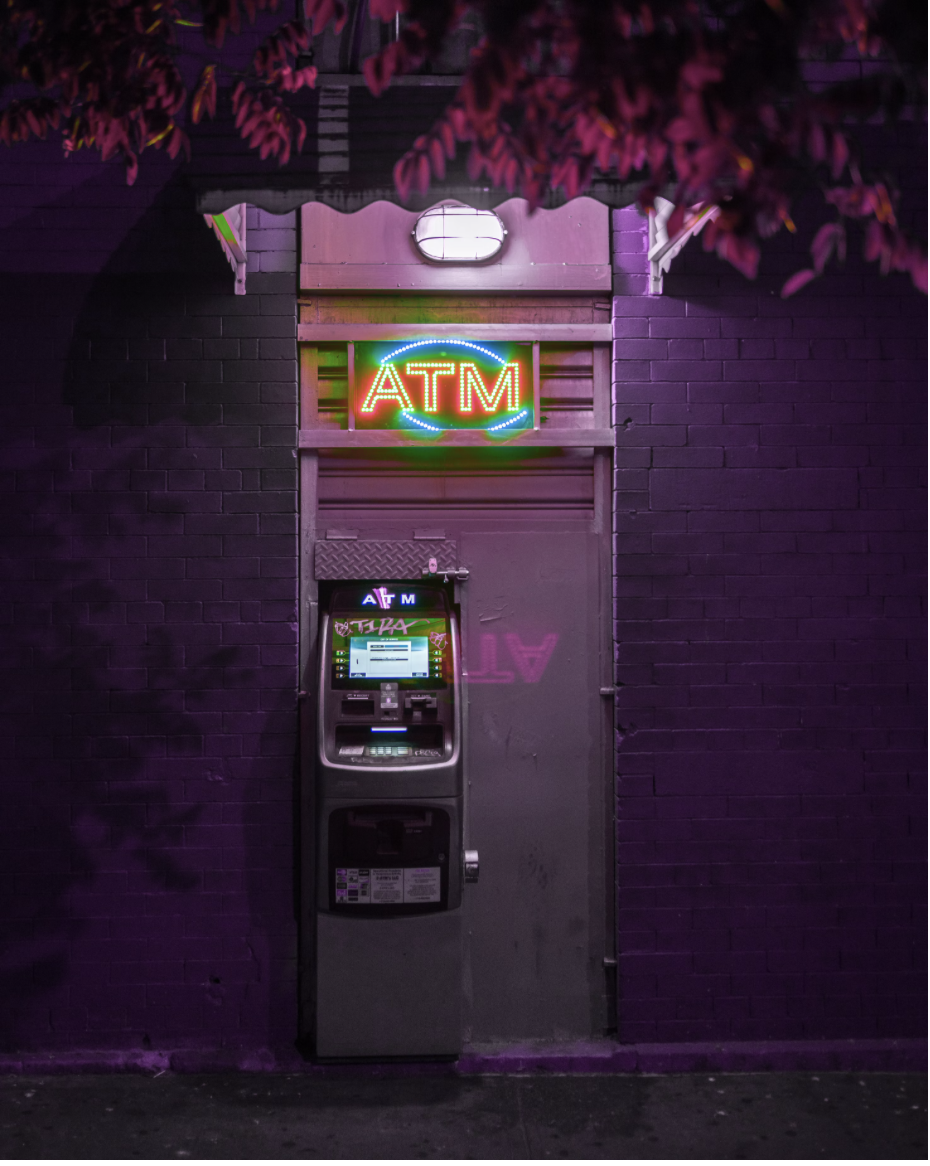

In [102]:
image_path = "/Users/Mthuthukile/Desktop/dspt18/Project-1-Individual-Mthuthukile/Screenshot 2025-03-12 at 16.27.01.png"
display(Image(filename=image_path, width=300))